<a href="https://colab.research.google.com/github/hyojunyee/kita_2404/blob/main/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/m5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%9C%A4%ED%9A%A8%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI기반 챗봇 및 OCR 개발 전문가 과정

### 교과목명 : 머신러닝
- 평가일 : 24. 8. 5
- 성명 : 윤효준
- 점수 :

Q1. load_breast_cancer 데이터셋을 불러와서 다음을 수행하세요.
- dt로 분류모델 생성 및 모델 정확도 평가(학습:검증 = 8:2)
- 하이퍼 파라미터는 분할 기준은 지니계수, 최대 깊이는 3으로 설정
- 결정트리를 시각화


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# print("cancer.keys():\n", cancer.keys())
load_breast_cancer().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 모델 학습 및 평가
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 학습 데이터 분할
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 학습 및 평가
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


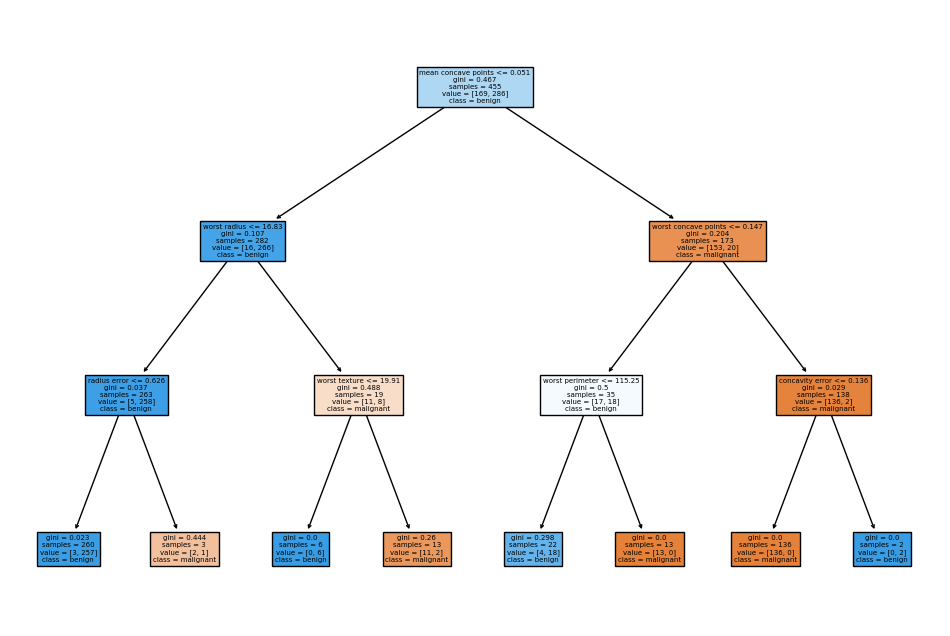

In [ ]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(dt_clf, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names)
plt.show()

Q2. 와인 데이터에 대해서 아래 사항을 고려하여 모델 생성 및 성능개선을 위한 하이퍼파라미터 튜닝을 수행한 후 테스트 데이터로 평가하세요.
- dt를 알고리즘으로 적용
- cv = 5
- param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4]}

In [ ]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 와인 데이터 불러오기
wine = datasets.load_wine()

In [ ]:
# 데이터 분할
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼 파라미터  튜닝 및 그리드서치
param_grid = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 3, 4]}
dt_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터로 모델 학습
best_dt_clf = grid_search.best_estimator_
print(f"Best Hyperparameters: {best_dt_clf}")

# 테스트 데이터로 평가
y_pred = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Best Hyperparameters: DecisionTreeClassifier(max_depth=3)
Accuracy: 0.94


Q3. 보스톤 주택가격 데이터셋에 대하여 규제 선형 모델인 릿지, 라쏘, 엘라스틱넷 모델로 교차검증을 수행하고 아래 각 모델의 알파값의 변화에 따른 회귀계수의 변화를 출력하세요. (단, 사용자 함수를 작성하여 수행)
- ridge_alphas = [0, 0.1, 1, 10, 100]
- lasso_alphas = [0.07,0.1,0.5,1,3]
- elastic_alphas = [0.07,0.1,0.5,1,3], L1:L2 = 0.7:0.3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="Boston", version=1, parser='auto')
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
print(boston_df.head())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


In [ ]:
# 필요한 feature이면 dtype 변환 -  category 타입을 먼저 수치형으로 변환
for col in boston_df.columns:
    if boston_df[col].dtype.name == 'category':
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)

In [ ]:
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)
y_target = boston_df['PRICE']

In [ ]:
# get_linear_reg_eval 사용자 함수
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np

# 선형 회귀 모델 평가 함수
def get_linear_reg_eval(model_name, params=None, X_data=None, y_target=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print('######', model_name, '######')
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        else:
            model = ElasticNet(alpha=param, l1_ratio=0.7)

        neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
        print(f'{model_name} - alpha {param}일 때 5 folds의 평균 RMSE: {avg_rmse:.4f}')

        model.fit(X_data, y_target)
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff

    return coeff_df

In [ ]:
# Ridge
ridge_alphas = [0, 0.1, 1, 10, 100]
coeff_ridge_df = get_linear_reg_eval('Ridge', params=ridge_alphas, X_data=X_data, y_target=y_target)
print("Ridge 회귀 계수:")
print(coeff_ridge_df)

###### Ridge ######
Ridge - alpha 0일 때 5 folds의 평균 RMSE: 5.7169
Ridge - alpha 0.1일 때 5 folds의 평균 RMSE: 5.6997
Ridge - alpha 1일 때 5 folds의 평균 RMSE: 5.6407
Ridge - alpha 10일 때 5 folds의 평균 RMSE: 5.5680
Ridge - alpha 100일 때 5 folds의 평균 RMSE: 5.4992
Ridge 회귀 계수:
           alpha:0  alpha:0.1   alpha:1  alpha:10  alpha:100
CRIM     -0.065053  -0.064891 -0.063989 -0.062459  -0.058398
ZN        0.042019   0.042188  0.043162  0.045368   0.049593
INDUS    -0.054296  -0.057680 -0.076297 -0.103658  -0.119831
CHAS      3.083844   3.064099  2.926289  2.241946   0.743225
NOX     -15.309381 -14.393344 -9.352364 -2.065726  -0.224029
RM        4.113720   4.118217  4.133037  3.948086   2.506996
AGE      -0.004222  -0.005011 -0.009245 -0.013267  -0.000336
DIS      -1.502090  -1.488188 -1.411882 -1.303622  -1.215504
RAD       0.097228   0.096776  0.094484  0.094287   0.099261
TAX       0.001546   0.001373  0.000422 -0.000939  -0.001055
PTRATIO  -0.822800  -0.813403 -0.762389 -0.701501  -0.738285
B         

In [ ]:
# Lasso
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data=X_data, y_target=y_target)
print("Lasso 회귀 계수:")
print(coeff_lasso_df)

###### Lasso ######
Lasso - alpha 0.07일 때 5 folds의 평균 RMSE: 5.6398
Lasso - alpha 0.1일 때 5 folds의 평균 RMSE: 5.6397
Lasso - alpha 0.5일 때 5 folds의 평균 RMSE: 5.7212
Lasso - alpha 1일 때 5 folds의 평균 RMSE: 5.9106
Lasso - alpha 3일 때 5 folds의 평균 RMSE: 6.2257
Lasso 회귀 계수:
         alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
CRIM      -0.060899  -0.060272  -0.047400 -0.027592 -0.000000
ZN         0.044466   0.044379   0.043056  0.043497  0.036646
INDUS     -0.100872  -0.096489  -0.065961 -0.035079 -0.000000
CHAS       1.814288   1.342789   0.000000  0.000000  0.000000
NOX       -0.000000  -0.000000  -0.000000 -0.000000  0.000000
RM         4.041496   3.958515   2.765466  1.230766  0.000000
AGE       -0.014060  -0.012398   0.001813  0.018729  0.042256
DIS       -1.231606  -1.215476  -0.987331 -0.693531 -0.000000
RAD        0.073730   0.067353   0.000000  0.000000  0.000000
TAX       -0.001620  -0.001739  -0.002674 -0.003469 -0.005808
PTRATIO   -0.675171  -0.680718  -0.685039 -0.652850 -0.250

In [ ]:
# Elasticnet
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elasticnet_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data=X_data, y_target=y_target)
print("ElasticNet 회귀 계수:")
coeff_elasticnet_df

###### ElasticNet ######
ElasticNet - alpha 0.07일 때 5 folds의 평균 RMSE: 5.5904
ElasticNet - alpha 0.1일 때 5 folds의 평균 RMSE: 5.5800
ElasticNet - alpha 0.5일 때 5 folds의 평균 RMSE: 5.5950
ElasticNet - alpha 1일 때 5 folds의 평균 RMSE: 5.7731
ElasticNet - alpha 3일 때 5 folds의 평균 RMSE: 6.1380
ElasticNet 회귀 계수:


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.060944,-0.060245,-0.049926,-0.035752,-0.000000
ZN,0.045591,0.045875,0.046041,0.045563,0.036390
INDUS,-0.105402,-0.103734,-0.090124,-0.063498,-0.000000
CHAS,1.619638,1.247154,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.817480,3.653256,2.103637,1.070492,0.000000
AGE,-0.012495,-0.010434,0.006584,0.019592,0.042696
DIS,-1.244686,-1.231931,-1.028697,-0.771315,-0.030723
RAD,0.081576,0.077310,0.000000,0.000000,0.000000
TAX,-0.001503,-0.001560,-0.002155,-0.002844,-0.005168


Q4. iris 데이터셋에 대하여 n_components=2를 적용하고 TruncatedSVD를 사용하여 추출된 2개의 component로 품종을 구분하는 것을 시각화 하세요.

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


iris = load_iris()
iris_ftrs = iris.data

iris_target = iris.target
iris_target_names = iris.target_names

In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
iris_ftrs_scaled = scaler.fit_transform(iris_ftrs)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# TruncatedSVD 적용
svd = TruncatedSVD(n_components=2)
iris_ftrs_svd = svd.fit_transform(iris_ftrs_scaled)

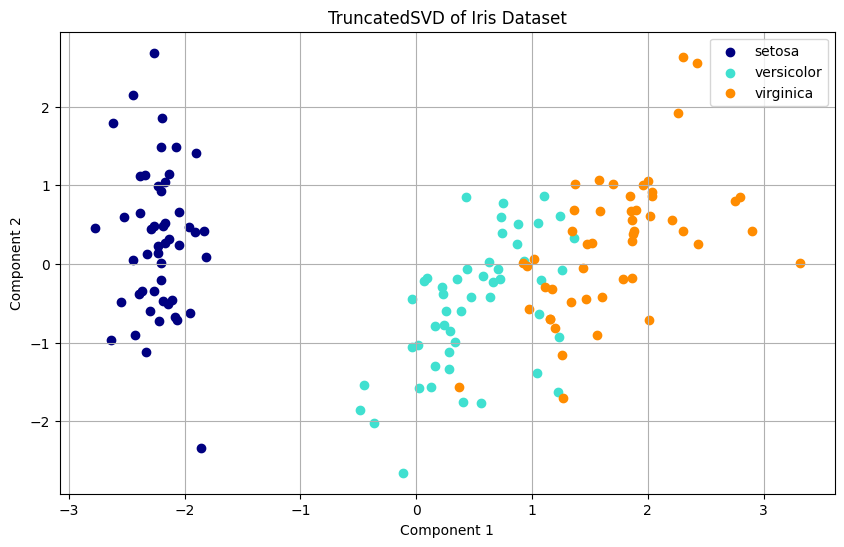

In [ ]:
import matplotlib.pyplot as plt

# 품종별 색상 설정
colors = ['navy', 'turquoise', 'darkorange']

# 시각화
plt.figure(figsize=(10, 6))
for color, i, target_name in zip(colors, [0, 1, 2], iris_target_names):
    plt.scatter(iris_ftrs_svd[iris_target == i, 0], iris_ftrs_svd[iris_target == i, 1], color=color, label=target_name)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('TruncatedSVD of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

Q5. iris 데이터셋의 sepal length,	sepal width,	petal length,	petal width 4개의 독립변수로 군집화를 수행 시 최적의 군집수를 산출하세요. 단, 군집개수별시뮬레이션을 시각화해서 최적의 군집수에 대한 이유도 설명

In [ ]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, n_init='auto', max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Iris 데이터셋 로드
iris = load_iris()
iris_ftrs = iris.data

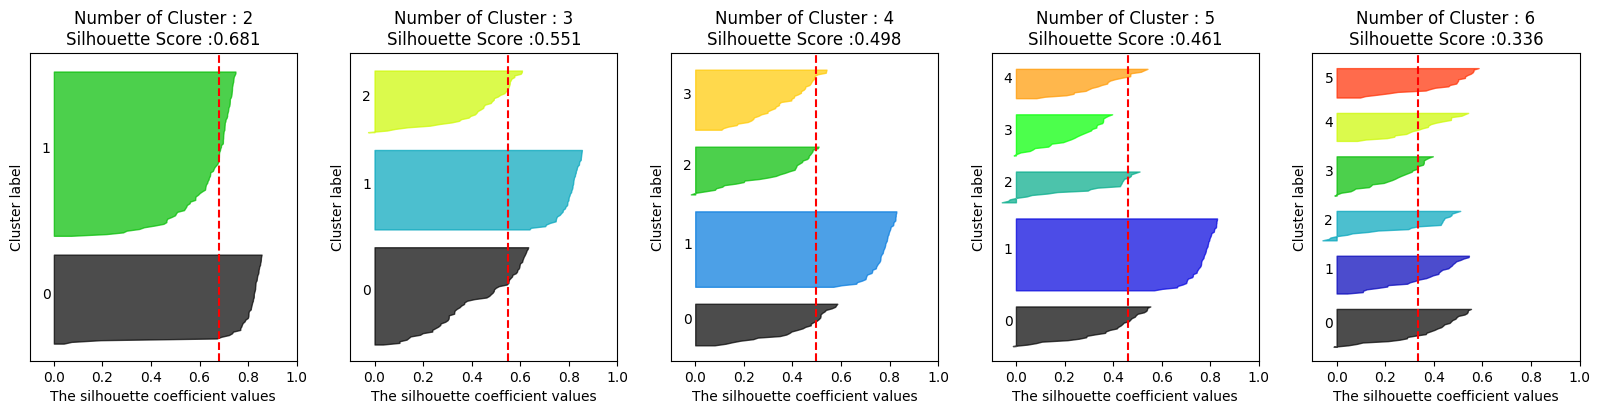

In [ ]:
cluster_lists = [2, 3, 4, 5, 6]

visualize_silhouette(cluster_lists, iris_ftrs)

- Cluster 2:
    - 두 개의 군집으로 나뉘며, 한 군집의 데이터가 많아 잘 나눠 져있지 않을 수 있으나, 평균값과 실루엣 스코어가 높음.
- Cluster 3:
    - 세개의 군집으로 나눠 졌으며, 두개로 나눈 군집에서 한쪽은 거의 그대로 온 모습으로 보임, 나머지 부분에 대해서 두 부분으로 나눠 졌고, 실루엣스코어가 떨어지긴 했으나, 평균값과 음의 값이 작은 것을 보면 잘 나눠졌다고 판단함.

실습과제1. 실습과제 코드를 작성하세요.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 데이터 로딩
data = load_breast_cancer()
X, y = data.data, data.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이프라인 구성
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD(n_components=2)),
    ('lr', LogisticRegression(max_iter=1000))
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'svd__n_components': [2, 5, 10],
    'lr__C': [0.1, 1, 10]
}

# GridSearchCV를 사용한 하이퍼 파라미터 튜닝
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")


# 평가 사용자 함수 정의
def evaluate_model(model, X_test, y_test):
    # 예측 수행
    y_pred = model.predict(X_test)
    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)
    # 분류 보고서 생성
    report = classification_report(y_test, y_pred)
    # ROC AUC 계산
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred)

    # 결과 출력
    print(f"Test Accuracy: {accuracy:.4f}\n")
    print(f"Classification Report:\n{report}\n")
    print(f"ROC AUC: {roc_auc:.4f}")

# 최적의 모델로 평가
evaluate_model(grid_search, X_test, y_test)

Best parameters found: {'lr__C': 1, 'svd__n_components': 10}
Test Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


ROC AUC: 0.9813


California_housing 데이터셋으로 아래사항을 참조하여 주택가격을 예측하는 회귀모델을 개발하세요.
- 전체 회귀모델을 적용
- 각 모델별 최적 하이퍼파라미터 - GridSearchCV 활용
- 평가지수 MSE 기준으로 가장 성능이 좋은 모델과 파라미터를 적용하여 평가 결과를 출력

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 로딩
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# 데이터 프레임으로 변환
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 모델 리스트
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'SVR': SVR()
}

# 모델별 파이프라인 생성
pipelines = {name: Pipeline([
    ('scaler', StandardScaler()),  # 데이터 스케일링
    ('model', model)               # 회귀 모델
]) for name, model in models.items()}

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from sklearn.model_selection import GridSearchCV

# 파이프라인별 그리드서치 함수 정의
def perform_grid_search(pipeline, param_grid, X_train, y_train, cv_folds=5):
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv_folds, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_model, best_params, best_score

In [ ]:
# 모델별 하이퍼파라미터 그리드
param_grids = {
    'Linear Regression': {},
    'Ridge': {'model__alpha': [0.1, 1, 10, 100]},
    'Lasso': {'model__alpha': [0.1, 1, 10, 100]},
    'ElasticNet': {'model__alpha': [0.1, 1, 10, 100],
                   'model__l1_ratio': [0.1, 0.5, 0.9]},
    'Random Forest': {
        'model__n_estimators': [100, 200, 500],
        'model__max_depth': [None, 10, 20, 30, 50],
        'model__min_samples_leaf': [1, 5, 10]
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200, 500],
        'model__learning_rate': [0.01, 0.1, 0.2]
    },
    'XGBoost': {
        'model__n_estimators': [100, 200, 500],
        'model__learning_rate': [0.01, 0.1, 0.2]
    },
    'LightGBM': {
        'model__n_estimators': [100, 200, 500],
        'model__learning_rate': [0.01, 0.1, 0.2]
    },
    'SVR': {
        'model__C': [0.1, 1, 10],
        'model__epsilon': [0.01, 0.1, 0.2]
    }
}


In [ ]:
# # 각 모델별로 그리드 서치를 수행
# results = {}
# for name, pipeline in pipelines.items():
#     print(f"Performing Grid Search for {name}...")
#     param_grid = param_grids.get(name, {})
#     best_model, best_params, best_score = perform_grid_search(pipeline, param_grid, X_train, y_train)
#     results[name] = {
#         'Best Model': best_model,
#         'Best Params': best_params,
#         'Best Score': best_score
#     }

# # 결과 출력
# for model_name, result in results.items():
#     print(f"\nModel: {model_name}")
#     print(f"Best Parameters: {result['Best Params']}")
#     print(f"Best Score (MSE): {result['Best Score']}")

- LightGBM
    - Best Score (MSE): -0.2071575971223607
    - Hyperparameters: {'model__learning_rate': 0.1, 'model__n_estimators': 500}

In [ ]:
# 가장 성능이 좋은 모델과 파라미터를 적용하여 평가 결과를 출력
lgbm_regressor = LGBMRegressor(n_estimators=500, learning_rate=0.1)
lgbm_regressor.fit(X_train, y_train)
y_pred = lgbm_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
Mean Squared Error (MSE): 0.19117695565006715
